# Homelessness Simulation Data Generator
This notebook generates homelessness data based on the input transition matrix. It will follow the matrix perfectly, for each week of the year, in the output data. This can then be used as input data to the algorithm as a way of verifying the process.

In [1]:
import random

# Set the number of states
num_states = 5

# Set the size of the population to generate
population = random.randrange(100, 1000)

# Set the number of weeks to generate
max_weeks = 120

# Set whether or not week-to-week transition probabilities will be used
weekly_transitions = True

# IFF weekly_transitions == True then define how much percentage to randomly
# vary the input CSV's transitions by for each week
weekly_variance = random.randrange(0, 25) / 100

# IFF weekly_transitions == True then define a mutation probability that will
# randomly mutate the probabilties each week
weekly_mutation = random.randrange(0, 25) / 100

# Set the random percentage to remove individuals
p_exit = random.randrange(0, 10) / 100

# Set the random percentage to spawn individuals
p_spawn = random.randrange(0, 10) / 100

# Set the output directory
output_dir = "raw_training_data"
prefix = "grp_one"

print("Population size: " + str(population))
print("Weekly variance: " + str(weekly_variance))
print("Weekly mutation: " + str(weekly_mutation))
print("P_exit: " + str(p_exit))
print("P_spawn: " + str(p_spawn))

Population size: 514
Weekly variance: 0.0
Weekly mutation: 0.22
P_exit: 0.0
P_spawn: 0.05


First, read the input transition matrix and display it to the user. IFF using weekly transitions, show the middle of the year's and the end's as well

In [2]:
# Read the input file
import pandas as pd
import decimal

from random import uniform

#matrix = pd.read_csv(inputFile)

data = "STATE"
for i in range(num_states):
    data += ";S" + str(i)
data += "\n"

for i in range(num_states):
    data += "S" + str(i)
    summed = 1.01
    
    rand_states = list(range(num_states))
    random.shuffle(rand_states)
    
    actual_states = list(range(num_states))
    for j in rand_states:
        summed = round(summed, 2)
        tmp = float(decimal.Decimal(random.randrange(0, int(round(summed * 100, 0))))/100)
        summed -= round(tmp, 2)
        actual_states[j] = tmp * 100
    
    for j in range(len(actual_states)):
        data += ";" + str(actual_states[j])
        
    if (i != num_states - 1):
        data += "\n"
 
matrix = pd.DataFrame([x.split(';') for x in data.split('\n')[1:]], columns=[x for x in data.split('\n')[0].split(';')])

states = matrix.shape[0]
#display(matrix.head(10))

# Generate the week-to-week matrices if applicable
if weekly_transitions:
    matricies = []
    matricies.append(matrix)
    
    for week in range(51):
        tmp_matrix = matricies[0].copy()
        
        # Generate the matrix
        tmp_totals = []
        for row in list(matrix.index):
            tmp_totals.append(0)
            for column in list(matrix.columns[1:]):
                tmp_val = float(matrix.loc[row][column])
                
                rnd_mod = uniform(1 - weekly_variance, 1 + weekly_variance)

                tmp_val *= rnd_mod
                
                tmp_matrix.at[row, column] = tmp_val
                tmp_totals[len(tmp_totals) - 1] += tmp_val
        
        # Normalize it
        rows = list(matrix.index)
        for i in range(len(rows)):
            
            for column in list(matrix.columns[1:]):
                tmp_matrix.at[rows[i], column] /= tmp_totals[i]
                tmp_matrix.at[rows[i], column] *= 100
                
        # Save it
        matricies.append(tmp_matrix.copy())
        
    # Write the first matrix for initialization
    matricies[0].to_csv("initial_matrix/" + prefix + "_matrix.csv", index=False)
    
    # Show the matrices
    for i in range(len(matricies)):
        print("WEEK " + str(i))
        display(matricies[i])
        print()

WEEK 0


,STATE,S0,S1,S2,S3,S4
0,S0,14.000000000000002,10.0,8.0,15.0,1.0
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.0,63.0,28.999999999999996,0.0,0.0
3,S3,68.0,0.0,7.000000000000001,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 1


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 2


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 3


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 4


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 5


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 6


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 7


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 8


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 9


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 10


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 11


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 12


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 13


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 14


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 15


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 16


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 17


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 18


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 19


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 20


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 21


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 22


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 23


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 24


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 25


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 26


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 27


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 28


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 29


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 30


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 31


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 32


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 33


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 34


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 35


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 36


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 37


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 38


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 39


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 40


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 41


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 42


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 43


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 44


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 45


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 46


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 47


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 48


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 49


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 50


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0



WEEK 51


,STATE,S0,S1,S2,S3,S4
0,S0,29.166667,20.833333,16.666667,31.25,2.083333
1,S1,59.0,3.0,1.0,1.0,36.0
2,S2,2.12766,67.021277,30.851064,0.0,0.0
3,S3,68.0,0.0,7.0,22.0,3.0
4,S4,4.0,0.0,96.0,0.0,0.0


Next, evenly distribute the population across each state to add up to the minimum population specified before. If it can't be evenly distributed, add to the minimum population until it's possible to do so

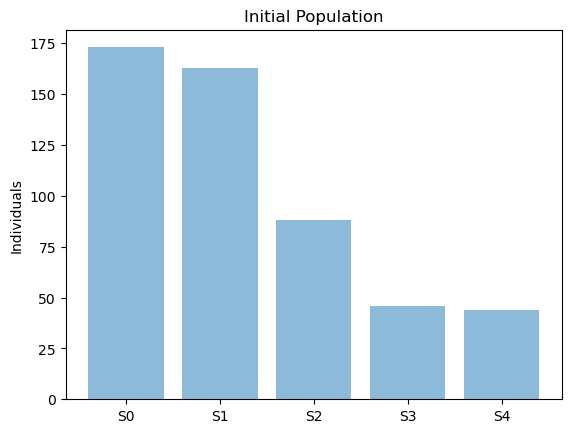

In [3]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Populate the states based on how low of a probability there is to go to it
# Lower == higher population

def initial_populations(population):
    # First, find out the total probability for each state
    prob_count = [0] * states
    for index, old_state in matrix.iterrows():
        ind = 0
        for new_state in old_state[1:]:
            prob_count[ind] += int(float(new_state))
            ind += 1

    # Then, normalize the values
    s = sum(prob_count)
    prob_count = [float(i)/s for i in prob_count]

    # Create the population with these probabilities in an inverse manner
    import numpy as np
    sorted_indicies = list(np.argsort(prob_count))
    initial_population = [0] * states
    for i in range(0, len(sorted_indicies)):
        initial_population[sorted_indicies[i]] = int(population *  prob_count[len(sorted_indicies) - 1 - i])

    # Make sure it adds up to the specified population
    if(sum(initial_population) != population):
        # If it doesn't, add to the largest population
        ind = initial_population.index(max(initial_population))
        initial_population[ind] += (population - sum(initial_population))

    # Display the initial population
    objects = list(matrix['STATE'])
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, initial_population, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Individuals')
    plt.title('Initial Population')

    plt.show()
    
    return initial_population

initial_population = initial_populations(population)

In [4]:
print(initial_population)

[173, 163, 88, 46, 44]


Next, generate data for each week up until the specified max number of weeks. The generated data will, as perfectly as possible, follow the transition probability matrix.

In [5]:
from copy import deepcopy as dc
import pandas as pd

def gen_dataset(initial_population, max_weeks, output_dir):
    # Cycle through each week up until the max
    dataset = list()
    prev_pop = initial_population
    dataset += [dc(prev_pop)]
    dataset[len(dataset) - 1].insert(0, 0)

    #filename = output_dir + "/96-sanity.txt"
    #f = open(filename, "w")
    #for val in prev_pop:
    #    f.write(str(val) + "\n")
    #f.close()

    totals = []
    for week in range(0, max_weeks):  
        # Make a list for the new population
        new_pop = [0] * states

        # If using weekly matricies, get the matrix for this week
        if (weekly_transitions):
            matrix = matricies[week % 52]

        # For each state, determine the exact number of people to transition
        transition_counts = [[] for x in range(0, states)]
        for index, old_state in matrix.iterrows():
            for new_state in old_state[1:]:
                # Get the percent of people to transition
                percent = int(float(new_state)) * 0.01

                # Mutate if needed
                if (weekly_transitions):
                    offset = percent * uniform(-weekly_mutation, weekly_mutation)
                    percent += offset

                # Append the number of people to transition
                transition_counts[index] += [int(prev_pop[index] * percent)]

        # Make sure that these new population values add up to the original population
        for i in range(0, len(transition_counts)):
            # Get the sum of this row
            total = sum(transition_counts[i])

            # Add to highest probability population if it doesn't add up
            if(total != prev_pop[i]):
                highest_prob = -1.0
                highest_ind = -1

                # Determine highest probability population
                probabilities = matrix.values.tolist()[i][1:]
                ind = probabilities.index(max(probabilities))
                transition_counts[i][ind] += (prev_pop[i] - total)

        # Set the new populations
        for i in range(0, len(transition_counts)):
            for j in range(0, len(transition_counts[i])):
                new_pop[j] += transition_counts[i][j]


        # Determine if we want to spawn or exit individuals from the simulation
        exit_chance = uniform(0, 1)
        if(exit_chance < p_exit):
            total = sum(new_pop)
            to_remove = int(total * exit_chance)

            for i in range(len(new_pop)):
                new_pop[i] -= int((new_pop[i] / total) * to_remove)
                
                # Ensure the rounding doesn't make it >0
                if (new_pop[i] < 0):
                    new_pop[i] = 0

        spawn_chance = uniform(0, 1)
        if(spawn_chance < p_spawn):
            total = sum(new_pop)
            to_spawn = int(total * spawn_chance)

            for i in range(len(new_pop)):
                new_pop[i] += int((new_pop[i] / total) * to_spawn)


        # Write this week to file
        if (week >= 5):
            totals.append(sum(new_pop))
            weekStr = "{0:03}".format(week - 5)
            filename = output_dir + "/" + weekStr + "-sanity_" + prefix + ".txt"
            f = open(filename, "w")
            for val in new_pop:
                f.write(str(val) + "\n")
            f.close()

        # Set this as the previous population for the next iteration
        prev_pop = new_pop
        dataset += [dc(prev_pop)]
        dataset[len(dataset) - 1].insert(0, week - 4)
    
    return dataset
    
dataset = gen_dataset(initial_population, max_weeks + 5, output_dir)[5:]

# Create a dataframe of the data
keys = list(matrix.keys())
keys[0] = 'WEEK'
results = pd.DataFrame(dataset, columns=keys)
results.head(15)

,WEEK,S0,S1,S2,S3,S4
0,0,159,134,107,77,37
1,1,181,105,109,63,56
2,2,174,115,130,56,39
3,3,177,124,110,70,37
4,4,177,123,98,77,43
5,5,189,116,100,63,50
6,6,167,109,115,86,41
7,7,192,114,97,80,35
8,8,167,104,108,85,54
9,9,184,117,112,62,43


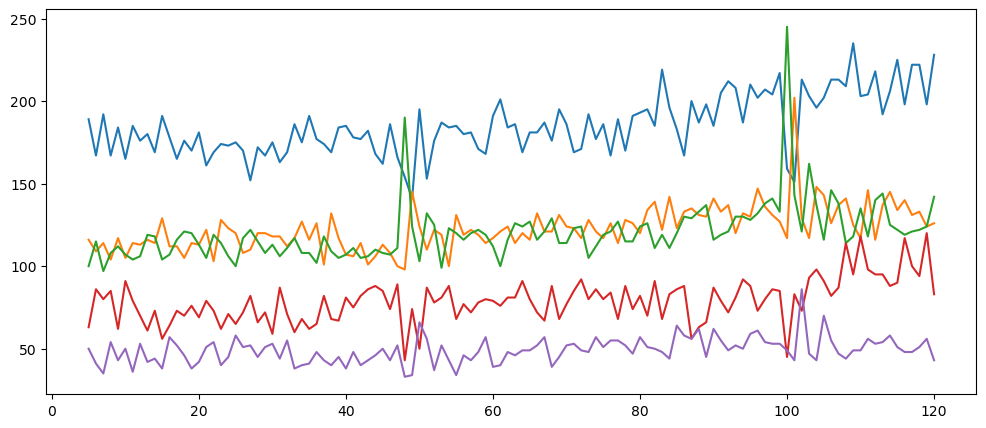

In [6]:
plt.figure(figsize=(12,5))
results_graph = results[5:]
plt.plot(results_graph['WEEK'], results_graph.loc[:, results_graph.columns != 'WEEK'])
plt.show()

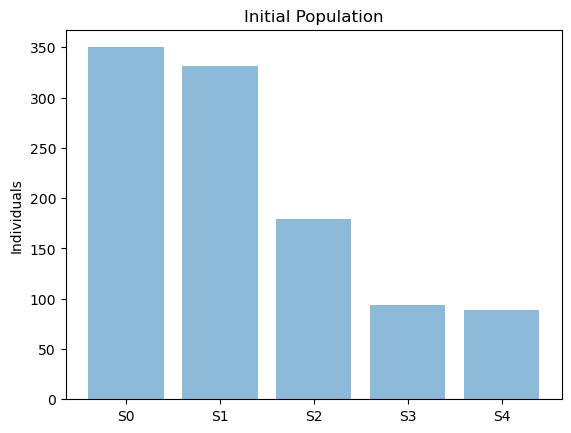

,WEEK,S0,S1,S2,S3,S4
0,0,311,253,255,165,107
1,1,359,242,253,140,97
2,2,385,252,242,127,85
3,3,349,271,215,139,117
4,4,375,213,242,170,91
5,5,391,264,209,143,84
6,6,374,244,225,151,97
7,7,337,210,239,187,118
8,8,376,215,268,156,76
9,9,367,301,229,132,95


In [7]:
# Generate the testing dataset which will use the same matrices and levels of stochasticity
population = random.randrange(1000, 10000)
max_weeks = 80
output_dir = "raw_testing_data"

initial_population = initial_populations(population)
dataset = gen_dataset(initial_population, max_weeks + 5, output_dir)[5:]

# Create a dataframe of the data
keys = list(matrix.keys())
keys[0] = 'WEEK'
results = pd.DataFrame(dataset, columns=keys)
results.head(15)

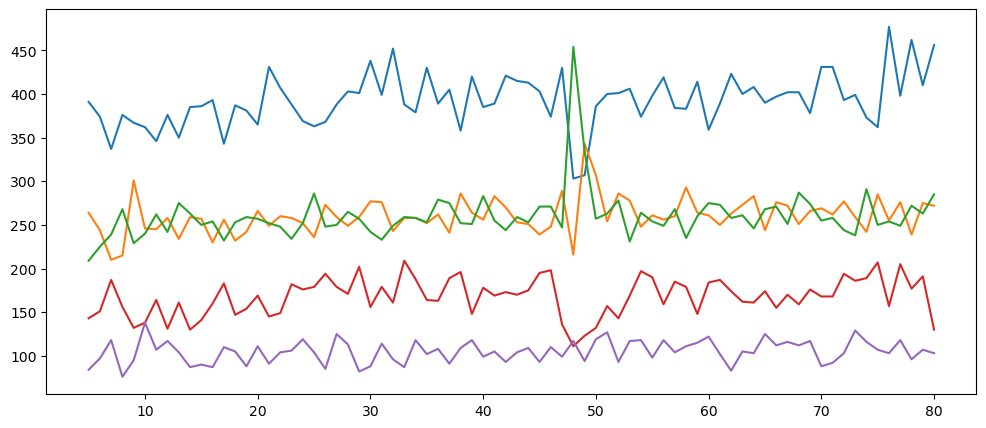

In [8]:
plt.figure(figsize=(12,5))
results_graph = results[5:]
plt.plot(results_graph['WEEK'], results_graph.loc[:, results_graph.columns != 'WEEK'])
plt.show()